# Classification model using Random Forest

### 1. Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

### 2. Upload Clinic data

In [2]:
path ="../../../../Data_preprocessing\RNA post_autoencoder+Clinic joined\Clinical_data_and_RNA_15_Features_PFS.csv"
data = pd.read_csv(path)
data.head()

,Unnamed: 0,RNA_ID,Age,Sarc,Rhab,Number_of_Prior_Therapies,Days_from_TumorSample_Collection_and_Start_of_Trial_Therapy,Tumor_Shrinkage,PFS,TM_TC_Ratio,...,IL25,LANCL1-AS1,LEMD1,PCMT1,RP11-120J4.1,RP11-374M1.2,SDR42E1,TARBP2,TRIM43B,VN2R17P
0,0,G138701_RCCBMS-00097-T_v1_RNA_OnPrem,62.0,0.0,0.0,2.0,707.0,0.0,5.490411,1.374775,...,0.693666,0.817111,0.678721,0.936250,0.663654,0.786407,1.000000,0.912529,0.587310,0.863040
1,1,G138701_RCCBMS-00099-T_v1_RNA_OnPrem,62.0,0.0,0.0,3.0,707.0,0.0,1.249315,1.374775,...,0.693666,0.817111,0.926248,0.958908,0.663654,0.786407,0.694015,0.903036,0.587310,0.863040
2,2,G138701_RCCBMS-00163-T_v1_RNA_OnPrem,62.0,0.0,0.0,2.0,707.0,0.0,5.654795,1.374775,...,0.693666,0.817111,0.880799,0.922139,0.663654,0.786407,0.869025,0.898032,0.587310,0.863040
3,3,G138701_RCCBMS-00116-T_v1_RNA_OnPrem,62.0,0.0,0.0,2.0,707.0,0.0,1.216438,1.374775,...,0.686828,0.794290,0.894078,0.921230,0.650857,0.772962,0.931136,0.873870,0.564337,0.855268
4,4,G138701_RCCBMS-00136-T_v1_RNA_OnPrem,62.0,0.0,0.0,2.0,707.0,0.0,2.860274,1.374775,...,0.689921,0.983649,0.802636,0.929383,0.793946,0.776255,0.902087,0.896762,0.552830,0.857563


In [3]:
Y = [] # Target column
# For each entry I classified it by its PFS value.
for i in range (len(data)):
    if data.PFS[i]<3: # If PFS is lower than 3 months, I will consider it as NonResponder (NR)
        Y.append(0)
    else:
        Y.append(1)# If PFS is over 3 months, I will consider it as Responder (R)

# As I won't need this columns any more, I deleted them.
data = data.drop('PFS', axis=1)
data = data.drop('RNA_ID', axis=1)

X = data.iloc[:,1:42] # I selected all the columns by removing the Unnamed column (row id) and the Target column.

print(X)
print('Numero de pacientes: ',len(Y))

      Age  Sarc  Rhab  Number_of_Prior_Therapies  \
0    62.0   0.0   0.0                        2.0   
1    62.0   0.0   0.0                        3.0   
2    62.0   0.0   0.0                        2.0   
3    62.0   0.0   0.0                        2.0   
4    62.0   0.0   0.0                        2.0   
..    ...   ...   ...                        ...   
139  62.0   0.0   0.0                        1.0   
140  62.0   0.0   0.0                        1.0   
141  62.0   0.0   0.0                        1.0   
142  62.0   0.0   0.0                        1.0   
143  62.0   0.0   0.0                        1.0   

     Days_from_TumorSample_Collection_and_Start_of_Trial_Therapy  \
0                                                707.0             
1                                                707.0             
2                                                707.0             
3                                                707.0             
4                                  

### 3. Train-Test dataset split

In [4]:
XTrain, XTest, yTrain, yTest = train_test_split(X, Y, test_size=0.20, random_state=125)

print('Training set size:', len(XTrain))
print('Target column size of the training set:', len(yTrain))
print('Test set size:', len(XTest))
print('Target column size of the test set:', len(yTest))

Training set size: 115
Target column size of the training set: 115
Test set size: 29
Target column size of the test set: 29


### 4. Select the parameters of the model and fit it

In [5]:
param_grid = {'min_samples_leaf': [1, 2, 3],
              'min_samples_split': [2, 3, 4, 5],
              'random_state':[125],
              'n_estimators': [10, 20],
              'bootstrap': [True, False],
              'criterion': ['gini', 'entropy'],
              'max_depth':[None, 2, 5, 10,50]
              }

# I created a GridSearchCV which allows us to systematically evaluate and select the parameters of our model.
# By indicating a model and the parameters to test, you can evaluate the performance of the first one based on the
# seconds through cross validation.
clf = GridSearchCV(
        estimator  = RandomForestClassifier(),
        param_grid = param_grid,
        cv=5
       )

clf.fit(XTrain , yTrain)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2, 5, 10, 50],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4, 5],
                         'n_estimators': [10, 20], 'random_state': [125]})

In [6]:
print("Mejor estimación de parámetros según GridSearchCV:")
print(clf.best_estimator_)
model = clf.best_estimator_

Mejor estimación de parámetros según GridSearchCV:
RandomForestClassifier(min_samples_leaf=3, n_estimators=10, random_state=125)


In [7]:
print("Best result of the cross validation of the model with the best paramters:" +str(clf.best_score_))


Best result of the cross validation of the model with the best paramters:0.5739130434782609


### 5. Prediction

In [8]:
# Making predictions with the optimal model on the training dataset
yhatTrain = model.predict(XTrain)
contTrain = 0

# Comparing with the Target column and check how many hits there have been
for i in range(0,len(yTrain),1) :
    if (yhatTrain[i] == yTrain[i]):
        contTrain = contTrain + 1

In [9]:
# Making predictions with the optimal model on the test dataset
yhatTest = model.predict(XTest)
contTest = 0

# Comparing with the Target column and check how many hits there have been
for i in range(0,len(yTest),1) :
    if (yhatTest[i] == yTest[i]):
        contTest = contTest + 1


### 6. Results

In [10]:
print('Final accuracy on the training dataset:' + str(contTrain/len(yTrain)))
print('Final accuracy on the testing dataset: ' + str(contTest/len(yTest)))

Final accuracy on the training dataset:0.8695652173913043
Final accuracy on the testing dataset: 0.5172413793103449


In [11]:
from sklearn.metrics import classification_report,confusion_matrix

print('----------------Confusion Matrix (Training)------------------')
print(confusion_matrix(yTrain,yhatTrain))
print('Input data:  ' + str(np.array(yTrain)))
print('Prediction:        ' +str(yhatTrain))

----------------Confusion Matrix (Training)------------------
[[62  4]
 [11 38]]
Input data:  [0 0 1 1 0 1 0 1 1 1 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 1 0 0 0 1 1 0 0 0 1
 1 0 0 0 0 1 1 1 0 1 0 1 0 0 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 1 0 1 1 0 0 0
 0 1 1 0 0 1 1 0 1 0 0 0 0 1 1 1 0 0 1 1 0 1 0 1 1 0 1 0 0 0 1 0 1 0 0 0 1
 0 1 0 0]
Prediction:        [0 0 1 1 0 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 1 0 0 0 1 1 0 0 0 1
 1 0 0 0 0 1 1 0 0 1 0 1 0 0 1 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 1 0 1 1 1 0 0
 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0]


In [12]:
print(classification_report(yTrain,yhatTrain))

              precision    recall  f1-score   support

           0       0.85      0.94      0.89        66
           1       0.90      0.78      0.84        49

    accuracy                           0.87       115
   macro avg       0.88      0.86      0.86       115
weighted avg       0.87      0.87      0.87       115



In [13]:
print('----------------Confusion Matrix (Test)------------------')
print(confusion_matrix(yTest,yhatTest))
print('Input data:  ' + str(np.array(yTest)))
print('Prediction:        ' +str(yhatTest))

----------------Confusion Matrix (Test)------------------
[[12  7]
 [ 7  3]]
Input data:  [1 0 1 0 0 1 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0]
Prediction:        [0 0 1 1 1 1 0 0 1 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0]


In [14]:
print(classification_report(yTest,yhatTest))

              precision    recall  f1-score   support

           0       0.63      0.63      0.63        19
           1       0.30      0.30      0.30        10

    accuracy                           0.52        29
   macro avg       0.47      0.47      0.47        29
weighted avg       0.52      0.52      0.52        29



Features with relevance over 0:  32
Features with relevance over 0.05:  7


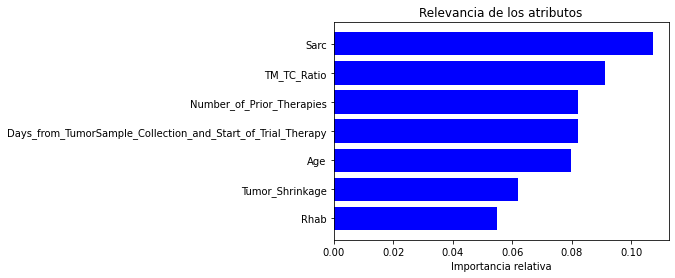

Age = 0.0
Sarc = 0.01672545393463607
Rhab = 0.012503555177696375
Number_of_Prior_Therapies = 0.020989975893983007
Days_from_TumorSample_Collection_and_Start_of_Trial_Therapy = 0.0
Tumor_Shrinkage = 0.0
TM_TC_Ratio = 0.0
Cohort_CM-009 = 0.014501821739858112
Cohort_CM-010 = 0.005808595501249495
Cohort_CM-025 = 0.003978383235585211
Sex_Female = 0.0
Sex_Male = 0.02237705106523676
MSKCC_FAVORABLE = 0.008778965173618352
MSKCC_INTERMEDIATE = 0.005487129732284987
MSKCC_NA = 0.03861611673828548
MSKCC_POOR = 0.01878779583401041
IMDC_FAVORABLE = 0.002470404765724425
IMDC_INTERMEDIATE = 0.028793554170500772
IMDC_NOT_REPORTED = 0.01966503831798821
IMDC_POOR = 0.011780093709157361
ImmunoPhenotype_Desert = 0.0
ImmunoPhenotype_Excluded = 0.0
ImmunoPhenotype_Infiltrated = 0.0285397419625139
ImmunoPhenotype_NA = 0.0018395177567443542
DLGAP4 = 0.07990489454989759
EIF4A1P9 = 0.02439982566668343
FAM172BP = 0.1071911190421239
GJA9 = 0.05496529579663403
GPR155 = 0.08210817594877308
IL25 = 0.00901234998075696

In [15]:
# Through the created model we can see which attributes are the most significant to make a decision.
# The most relevant attributes will be the ones placed at the top of the tree.
features = list(X)
importances = model.feature_importances_

elems_over_0 = np.fromiter((element for element in importances if element > 0), dtype = importances.dtype)
print('Features with relevance over 0: ', len(elems_over_0))

newArray = np.fromiter((element for element in importances if element > 0.05), dtype = importances.dtype)
importances=newArray
indices = np.argsort(importances)
print('Features with relevance over 0.05: ', len(newArray))

plt.title('Relevancia de los atributos')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Importancia relativa')
plt.show()

for name, importance in zip(X, model.feature_importances_):
    print(name, "=", importance)

# Attributes whose relevance is 0, will not be necessary to make the prediction of the target.